# 1. Titanic
## (a). Chi sq test for H0=Survival is independent of gender?

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

df = pd.read_csv("Titanic-Dataset.csv")
total = len(df)
print(f'total={total}')
males = len(df[df["Sex"]=="male"])
print(f'males={males}')
survived = df["Survived"].sum()
print(f'survived={survived}')
male_survived = df[df["Sex"]=="male"]["Survived"].sum()
print(f'male_survived={male_survived}')
females = len(df[df["Sex"]=="female"])
print(f'females={females}')
female_survived = df[df["Sex"]=="female"]["Survived"].sum()
print(f'female_survived={female_survived}')

matrix = np.array([[male_survived, males - male_survived], 
[female_survived, females - female_survived]])

print(matrix)
chi2, p_value, dof, exp_matrix = chi2_contingency(matrix)

print(f'chi2={chi2}, p_value={p_value}, dof={dof}, exp_matrix={exp_matrix}')

if p_value < 0.05:
    print('Null hypothesis is rejected! Survival is not independent of gender')
else:
    print('Null hypothesis can NOT be rejected! Survival is independent of gender')



total=891
males=577
survived=342
male_survived=109
females=314
female_survived=233
[[109 468]
 [233  81]]
chi2=260.71702016732104, p_value=1.1973570627755645e-58, dof=1, exp_matrix=[[221.47474747 355.52525253]
 [120.52525253 193.47474747]]
Null hypothesis is rejected! Survival is not independent of gender
[3 1 2]
[[119. 372.]
 [136.  80.]
 [ 87.  97.]]
chi2=102.88898875696059, p_value=4.5492517112987275e-23, dof=2, exp_matrix=[[188.46464646 302.53535354]
 [ 82.90909091 133.09090909]
 [ 70.62626263 113.37373737]]
Null hypothesis is rejected! Survival is not independent of class


## (b). Chi sq test for H0=Survival is independent of class?

In [ ]:

print(df["Pclass"].unique())

numclasses = len(df["Pclass"].unique())
matrix = np.zeros((numclasses,2))
for i,pclass in enumerate(df["Pclass"].unique()):
    matrix[i][0] = len(df[(df["Pclass"]==pclass) & (df["Survived"]==1)])
    matrix[i][1] = len(df[(df["Pclass"]==pclass) & (df["Survived"]==0)])

print(matrix)
chi2, p_value, dof, exp_matrix = chi2_contingency(matrix)

print(f'chi2={chi2}, p_value={p_value}, dof={dof}, exp_matrix={exp_matrix}')

if p_value < 0.05:
    print('Null hypothesis is rejected! Survival is not independent of class')
else:
    print('Null hypothesis can NOT be rejected! Survival is independent of class')

# 2. K-means algorithm

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Text(0, 0.5, 'Spending Score (1-100)')

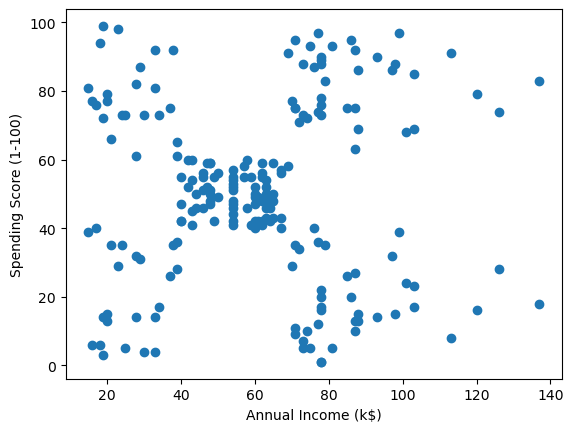

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

print(df.head())

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

[[15. 39.]
 [15. 81.]
 [16.  6.]
 [16. 77.]
 [17. 40.]]
[[25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 3 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 4 2 3 2 4 2 4 2 3 2 4 2 4 2 4 2 4 2 3 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Text(0, 0.5, 'Spending Score (1-100)')

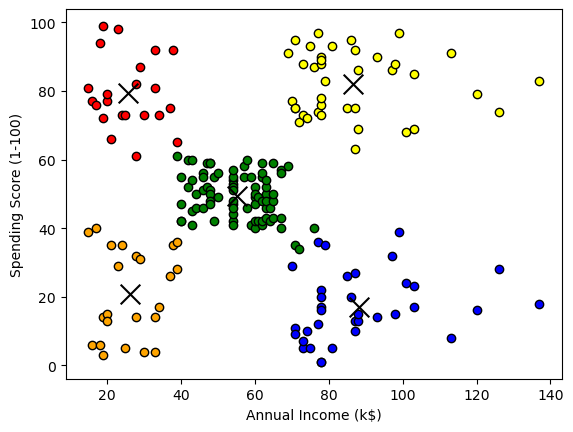

In [53]:
from scipy.cluster.vq import kmeans2
points = np.array(df[["Annual Income (k$)", "Spending Score (1-100)"]].to_numpy()).astype(float)
print(points[:5])
centroids, labels = kmeans2(points, k=5, minit='points')
print(centroids)
print(labels)
colors = ["red", "orange", "yellow", "green", "blue"]
for i, point in enumerate(points):
    plt.scatter(point[0], point[1], color=colors[labels[i]],edgecolors='black')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, color='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")